# Data Science Individual Project

# Code Explaination 
# Part 1 ::

# Step 1 :

Just scrape the space weather data and looking for table tag , this step is finished by transform table to dataframe

# Step 2 : 

drop the unnecessary columns and combine date and time columns 

# Step 3 :

Scrapping nasa data and get the specific tag with performing string manipulation to get required data 

# Step 4 : 

Clean nasa data and add the required columns 

# Part 2 :: 

# Question 1 : 

After investegating the data , we could replicate 75 % of Space Weather data

# Question 2 : 
 The Function acquired the best matches using the following strategies : 
        1 - Check if date and importance are equal (Perfect Matching 75%)
        2 - check if date is equal (Matching 25%)
        we can justify the second critieria that may be there is a difference in recorded start time           and end time or that there was an error when recording (human/instrument)error 
# Question 3 : 
2 Scatter plots show Start Frequency of Solar Flare over time using two colors (red and blue ) : 
red for top 50 flares  
blue otherwise 
first scatter plot is start Frequency versus Years , we conclude that the year with most (top 50)  solar flares is 2003 with 7 Flares 
second scatter plot is start Frequency versus Months , we conclude that the month with most (top 50) solar flares is November with 13 Flares 

# Imports 

In [48]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Step 1  

In [49]:
page = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")

In [50]:
page.content

b'<!doctype html>\n<html lang="en">\n    <head>\n        <title>Top 50 solar flares | Solar activity | SpaceWeatherLive.com</title>\n        <meta charset="utf-8" />\n        <meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n        <meta name="description" content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." />\n        <meta name="keywords" content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" />\n        <!-- Facebook meta -->\n        <meta property="og:url" content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" />\n        <meta prope

In [51]:
soup = BeautifulSoup(page.content, 'html.parser')

In [52]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 50 sol

In [53]:
table = soup.find_all('table')[0]
print(table)
df = pd.read_html(table.prettify())[0]

<table class="table table-striped table-responsive-md"><thead><tr><th></th><th></th><th></th><th>Region</th><th>Start</th><th>Maximum</th><th>End</th><th></th></tr></thead><tbody><tr><td>1</td><td><span class="flare_small Xclass">X28+</span></td><td>2003/11/04</td><td><span class="badge badge-region_mag BGD"><a href="/en/solar-activity/region/10486">0486</a></span></td><td>19:29</td><td>19:53</td><td>20:06</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" data-fancybox="" href="/images/Archief/2003/Flares/200311041953X28.0.mp4"><i aria-hidden="true" class="far fa-play-circle"></i> Movie</a><a class="btn btn-xs btn-outline-dark" href="/en/archive/2003/11/04/xray">View archive</a></div></td></tr><tr><td>2</td><td><span class="flare_small Xclass">X20+</span></td><td>2001/04/02</td><td><span class="badge badge-region_mag BGD"><a href="/en/solar-activity/region/9393">9393</a></span></td><td>21:32</td><td>21:51</td><td>22:03</td><td><div class="btn-group"><a class="btn bt

In [54]:
df.rename(columns={"Unnamed: 0": "rank", "Unnamed: 1": "x_class","Unnamed: 2": "date","Region": "region","Start": "start_time","Maximum": "max_time","End": "end_time","Unnamed: 7": "movie"},inplace=True)
df

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


# Step 2 

In [55]:
df.drop(columns=['movie'],inplace=True)

In [56]:
df

,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


In [57]:
cols = df.columns[df.columns.str.contains('time')]
for col in cols : 
    df[col] = pd.to_datetime(df['date'] + df[col], format='%Y/%m/%d%H:%M')
df.replace('-',None)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,2003/10/29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,1997/11/06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2017/09/06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,2006/12/05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,2003/11/02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [58]:
df.drop(columns=['date'],inplace=True)

In [59]:
df

,rank,x_class,region,start_time,max_time,end_time
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


# Step 3 

In [60]:
page = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")

In [61]:
page.content

b'<html><body>\n<h2>Wind/WAVES type II bursts and CMEs</h2>\n<a href="waves_type2_description.htm">A Brief Description</a>\n<pre>\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.n

In [62]:
soup = BeautifulSoup(page.content, 'html.parser')

In [63]:
soup.prettify()

'<html>\n <body>\n  <h2>\n   Wind/WAVES type II bursts and CMEs\n  </h2>\n  <a href="waves_type2_description.htm">\n   A Brief Description\n  </a>\n  <pre>\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n1997/04/01 14:00 04/01 14:15  <a

In [64]:
table = soup.find_all('pre')[0]


In [65]:
table.prettify()

'<pre>\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_mo

In [66]:
content = table.get_text()
splitted_content=content.split("=================================================================================================")

In [67]:
string_table = splitted_content[2]
temp =string_table.split("\n")
lst = [] 
for item in temp : 
    if item !='':
       lst.append(item.split()[0:15])

In [68]:
data = pd.DataFrame(lst)

In [69]:
for item in data.columns:
    print(item)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [70]:
data.rename(columns={0:'Start_Date',1:'Start_Time',2:'End_Date',3:'End_Time',4:'Start_Frequency',5:'End_Frequency',6:'Flare_Location',7:'Flare_Region',8:'Importance',9:'CME_Date',10:'CME_Time',11:'CPA',12:'Width',13:'Speed',14:'Plots'}, inplace=True)


In [71]:
data

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,Plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418,PHTX
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571,PHTX
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163,PHTX
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX


# Step 4

In [72]:
tmp = pd.DatetimeIndex(data['Start_Date']).year
years = []
q = [] 
for item in data['End_Time']:
    if item=='24:00':
        q.append('00:00')
    else:
        q.append(item)
data['End_Time']=q
for item in tmp : 
    years.append(str(item)+'/')
data['End_Date'] = years+data['End_Date']

In [73]:
data['End_DateTime'] = pd.to_datetime(data['End_Date'] + data['End_Time'], format='%Y/%m/%d%H:%M')

In [74]:
data['Start_DateTime'] = pd.to_datetime(data['Start_Date'] + data['Start_Time'], format='%Y/%m/%d%H:%M')

In [75]:
# Clean CME date and time to create new column cme datetime 
data['CME_Date']=data['CME_Date'].replace('--/--',np.nan)
data['CME_Time']=data['CME_Time'].replace('--:--',np.nan)

In [76]:
tmp = pd.DatetimeIndex(data['Start_Date']).year
date = []
for i in range(np.shape(data)[0]):
    if type(data['CME_Date'].iloc[i])!=float and i!=np.shape(data)[0]-1 :
        date.append(str(tmp[i])+'/'+data['CME_Date'].iloc[i])
    else:
        date.append(np.nan)
print(date)
    

['1997/04/01', '1997/04/07', '1997/05/12', '1997/05/21', '1997/09/23', '1997/11/03', '1997/11/03', '1997/11/04', '1997/11/06', '1997/11/27', '1997/12/13', '1998/01/25', '1998/03/29', '1998/04/20', '1998/04/23', '1998/04/24', '1998/04/27', '1998/04/29', '1998/05/02', '1998/05/06', '1998/05/09', '1998/05/11', '1998/05/19', '1998/05/27', '1998/06/11', '1998/06/16', '1998/06/20', '1998/06/22', '1998/11/02', '1998/11/05', '1998/11/06', '1998/11/07', '1998/11/08', '1998/12/18', '1999/04/24', '1999/05/03', '1999/05/27', '1999/06/01', '1999/06/04', '1999/06/11', '1999/06/22', '1999/06/23', '1999/06/23', '1999/06/28', '1999/06/29', '1999/07/05', '1999/08/28', '1999/09/03', '1999/09/10', '1999/10/14', '1999/10/18', '1999/11/16', '1999/11/16', '2000/01/18', '2000/01/28', '2000/02/05', '2000/02/08', '2000/02/10', '2000/02/12', '2000/02/17', '2000/02/18', '2000/03/02', '2000/03/07', '2000/03/27', '2000/04/04', '2000/04/10', '2000/04/18', '2000/05/04', '2000/05/05', '2000/05/07', '2000/05/12', '2000

In [77]:
data['CME_Date']=date
data['CME_Date']
#data.drop(data.index[-1],inplace=True)

0      1997/04/01
1      1997/04/07
2      1997/05/12
3      1997/05/21
4      1997/09/23
          ...    
513    2017/09/04
514    2017/09/06
515    2017/09/10
516    2017/09/12
517           NaN
Name: CME_Date, Length: 518, dtype: object

In [78]:
CME_DateTime = []
for i in range(np.shape(data)[0]):
    if type(data['CME_Date'].iloc[i])!=float and type(data['CME_Time'].iloc[i])!=float:
        CME_DateTime.append(pd.to_datetime(data['CME_Date'].iloc[i]+data['CME_Time'].iloc[i], format='%Y/%m/%d%H:%M'))
    else:
        CME_DateTime.append(np.nan)

In [79]:
data['CME_DateTime']=CME_DateTime

In [80]:
# Create New Columns and replace invalid values with Nan
data['is_halo']=(data['CPA']=='Halo')
data['CPA']=data['CPA'].replace('Halo', np.nan)
data['CPA']=data['CPA'].replace('----', np.nan)
data['CPA']=data['CPA'].replace('---', np.nan)

In [81]:
data

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,Plots,End_DateTime,Start_DateTime,CME_DateTime,is_halo
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79,312,PHTX,1997-04-01 14:15:00,1997-04-01 14:00:00,1997-04-01 15:18:00,False
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,NaN,360,878,PHTX,1997-04-07 17:30:00,1997-04-07 14:30:00,1997-04-07 14:27:00,True
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,NaN,360,464,PHTX,1997-05-14 16:00:00,1997-05-12 05:15:00,1997-05-12 05:30:00,True
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165,296,PHTX,1997-05-21 22:00:00,1997-05-21 20:20:00,1997-05-21 21:00:00,False
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155,712,PHTX,1997-09-23 22:16:00,1997-09-23 21:53:00,1997-09-23 22:02:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,2017/09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,20:12,NaN,360,1418,PHTX,2017-09-05 04:54:00,2017-09-04 20:27:00,2017-09-04 20:12:00,True
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,NaN,360,1571,PHTX,2017-09-07 08:00:00,2017-09-06 12:05:00,2017-09-06 12:24:00,True
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,-----,X8.3,2017/09/10,16:00,NaN,360,3163,PHTX,2017-09-11 06:50:00,2017-09-10 16:02:00,2017-09-10 16:00:00,True
516,2017/09/12,07:38,2017/09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,08:03,124,96,252,PHTX,2017-09-12 07:43:00,2017-09-12 07:38:00,2017-09-12 08:03:00,False


In [82]:
lower_bound=[]
width_numeric =[]
for item in data['Width']:
    q = str(item)
    if q[0]=='>':
        q=q[1:len(q)]
        width_numeric.append(int(q))
        lower_bound.append(True)
    elif q =='----' or q=='---':
        lower_bound.append(False)
        width_numeric.append(np.nan)
    else:
        if q[-1]=='h':
             q=q[0:len(q)-1] 
        lower_bound.append(False)
        width_numeric.append(int(q))

In [83]:
data['Width']=width_numeric
data['Width_Lower']=lower_bound

In [84]:
data

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,Plots,End_DateTime,Start_DateTime,CME_DateTime,is_halo,Width_Lower
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79.0,312,PHTX,1997-04-01 14:15:00,1997-04-01 14:00:00,1997-04-01 15:18:00,False,False
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,NaN,360.0,878,PHTX,1997-04-07 17:30:00,1997-04-07 14:30:00,1997-04-07 14:27:00,True,False
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,NaN,360.0,464,PHTX,1997-05-14 16:00:00,1997-05-12 05:15:00,1997-05-12 05:30:00,True,False
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165.0,296,PHTX,1997-05-21 22:00:00,1997-05-21 20:20:00,1997-05-21 21:00:00,False,False
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155.0,712,PHTX,1997-09-23 22:16:00,1997-09-23 21:53:00,1997-09-23 22:02:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,2017/09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,20:12,NaN,360.0,1418,PHTX,2017-09-05 04:54:00,2017-09-04 20:27:00,2017-09-04 20:12:00,True,False
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,NaN,360.0,1571,PHTX,2017-09-07 08:00:00,2017-09-06 12:05:00,2017-09-06 12:24:00,True,False
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,-----,X8.3,2017/09/10,16:00,NaN,360.0,3163,PHTX,2017-09-11 06:50:00,2017-09-10 16:02:00,2017-09-10 16:00:00,True,False
516,2017/09/12,07:38,2017/09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,08:03,124,96.0,252,PHTX,2017-09-12 07:43:00,2017-09-12 07:38:00,2017-09-12 08:03:00,False,False


# Replace Invalid Values 

In [85]:
data['Importance']=data['Importance'].replace('----', np.nan)

In [86]:
data['Flare_Region']=data['Flare_Region'].replace('-----', np.nan)
data['Flare_Region']=data['Flare_Region'].replace('EP', np.nan)
data['Flare_Region']=data['Flare_Region'].replace('EP?', np.nan)
data['Flare_Region']=data['Flare_Region'].replace('DIM', np.nan)
data['Flare_Region']=data['Flare_Region'].replace('FILA', np.nan)
data['Flare_Region']=data['Flare_Region'].replace('DSF', np.nan)
data['Flare_Region']=data['Flare_Region'].replace('altr', np.nan)

In [87]:
data['Flare_Location']=data['Flare_Location'].replace('BACK', np.nan)

In [88]:
data['Start_Frequency']=data['Start_Frequency'].replace('????', np.nan)
data['End_Frequency']=data['End_Frequency'].replace('????', np.nan)

In [89]:
data

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,Plots,End_DateTime,Start_DateTime,CME_DateTime,is_halo,Width_Lower
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79.0,312,PHTX,1997-04-01 14:15:00,1997-04-01 14:00:00,1997-04-01 15:18:00,False,False
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,NaN,360.0,878,PHTX,1997-04-07 17:30:00,1997-04-07 14:30:00,1997-04-07 14:27:00,True,False
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,NaN,360.0,464,PHTX,1997-05-14 16:00:00,1997-05-12 05:15:00,1997-05-12 05:30:00,True,False
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165.0,296,PHTX,1997-05-21 22:00:00,1997-05-21 20:20:00,1997-05-21 21:00:00,False,False
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155.0,712,PHTX,1997-09-23 22:16:00,1997-09-23 21:53:00,1997-09-23 22:02:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,2017/09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,20:12,NaN,360.0,1418,PHTX,2017-09-05 04:54:00,2017-09-04 20:27:00,2017-09-04 20:12:00,True,False
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,NaN,360.0,1571,PHTX,2017-09-07 08:00:00,2017-09-06 12:05:00,2017-09-06 12:24:00,True,False
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,NaN,X8.3,2017/09/10,16:00,NaN,360.0,3163,PHTX,2017-09-11 06:50:00,2017-09-10 16:02:00,2017-09-10 16:00:00,True,False
516,2017/09/12,07:38,2017/09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,08:03,124,96.0,252,PHTX,2017-09-12 07:43:00,2017-09-12 07:38:00,2017-09-12 08:03:00,False,False


# Part 2 : Analysis

# Question 1 

In [90]:
def sort(data,col):
    values_and_index=[]
    for i in range(np.shape(data)[0]):
        if type(data[col].iloc[i])!=float and data[col].iloc[i][0]=='X':
               tmp=data[col].iloc[i]
               tmp=tmp[1:len(tmp)]
               if data[col].iloc[i][-1]=='.':
                   tmp+='0'
               values_and_index.append(tuple((float(tmp),i)))
 
    values_and_index.sort(reverse=True)
    sorted_indexes = [index for value,index in values_and_index] 
    return sorted_indexes


In [91]:
def sort2(data,col):
    values_and_index=[]
    for i in range(np.shape(data)[0]):
        if type(data[col].iloc[i])!=float and data[col].iloc[i][0]=='X':
               tmp=data[col].iloc[i]
               tmp=tmp[1:len(tmp)]
               if data[col].iloc[i][-1]=='.':
                   tmp+='0'
               values_and_index.append(tuple((float(tmp),i)))
 
    values_and_index.sort(reverse=True)
    sorted_indexes = [index for value,index in values_and_index] 
    sorted_values  = [value for value,index in values_and_index] 
    return (sorted_indexes,sorted_values)

In [92]:
top_50 =sort(data,'Importance')[0:50]
data.iloc[top_50]

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,Plots,End_DateTime,Start_DateTime,CME_DateTime,is_halo,Width_Lower
240,2003/11/04,20:00,2003/11/04,00:00,10000,200,S19W83,10486,X28.,2003/11/04,19:54,NaN,360.0,2657,PHTX,2003-11-04 00:00:00,2003-11-04 20:00:00,2003-11-04 19:54:00,True,False
117,2001/04/02,22:05,2001/04/03,02:30,14000,250,N19W72,9393,X20.,2001/04/02,22:06,261,244.0,2505,PHTX,2001-04-03 02:30:00,2001-04-02 22:05:00,2001-04-02 22:06:00,False,False
233,2003/10/28,11:10,2003/10/29,00:00,14000,40,S16E08,10486,X17.,2003/10/28,11:30,NaN,360.0,2459,PHTX,2003-10-29 00:00:00,2003-10-28 11:10:00,2003-10-28 11:30:00,True,False
126,2001/04/15,14:05,2001/04/16,13:00,14000,40,S20W85,9415,X14.,2001/04/15,14:06,245,167.0,1199,PHTX,2001-04-16 13:00:00,2001-04-15 14:05:00,2001-04-15 14:06:00,False,False
234,2003/10/29,20:55,2003/10/29,00:00,11000,500,S15W02,10486,X10.,2003/10/29,20:54,NaN,360.0,2029,PHTX,2003-10-29 00:00:00,2003-10-29 20:55:00,2003-10-29 20:54:00,True,False
8,1997/11/06,12:20,1997/11/07,08:30,14000,100,S18W63,8100,X9.4,1997/11/06,12:10,NaN,360.0,1556,PHTX,1997-11-07 08:30:00,1997-11-06 12:20:00,1997-11-06 12:10:00,True,False
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,NaN,360.0,1571,PHTX,2017-09-07 08:00:00,2017-09-06 12:05:00,2017-09-06 12:24:00,True,False
328,2006/12/05,10:50,2006/12/05,20:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,----,PHTX,2006-12-05 20:00:00,2006-12-05 10:50:00,NaT,False,False
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,NaN,X8.3,2017/09/10,16:00,NaN,360.0,3163,PHTX,2017-09-11 06:50:00,2017-09-10 16:02:00,2017-09-10 16:00:00,True,False
237,2003/11/02,17:30,2003/11/03,01:00,12000,250,S14W56,10486,X8.3,2003/11/02,17:30,NaN,360.0,2598,PHTX,2003-11-03 01:00:00,2003-11-02 17:30:00,2003-11-02 17:30:00,True,False


In [93]:
# After investigating the data i can say that we can replicate up to 75% 
# of space weather site's data from Nasa Data 

# Question 2 

In [94]:
import math 
def similarity(nasa_data,space_data):
    order = np.zeros((np.shape(nasa_data)[0],1))
    sorted_indexes,sorted_importances = sort2(nasa_data,'Importance')
    similar_found=[]
    idx = 0 
    for item in space_data['x_class']:
        tmp = item[1:len(item)]
        if tmp[-1]=='+':
            tmp = tmp[0:len(tmp)-1]
        if tmp[-1]=='.':
            tmp+='0'
        tmp = float(tmp)
        
        for i in range(np.shape(sorted_importances)[0]):
            year,month,day = nasa_data['Start_Date'].iloc[sorted_indexes[i]].split('/')
            if int(year) == int(space_data['start_time'].iloc[idx].year) and int(month)==int(space_data['start_time'].iloc[idx].month)and int(day)==int(space_data['start_time'].iloc[idx].day):
                    similar_found.append(idx)
                    order[sorted_indexes[i]]=idx+1
                    break
        idx+=1
    
    return (similar_found,order)

In [95]:
matched,ordered = similarity(data,df)

In [96]:
rank = []
for item in ordered:
    rank.append(int(item))

In [97]:
data['rank']=rank

In [98]:
data

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,...,CPA,Width,Speed,Plots,End_DateTime,Start_DateTime,CME_DateTime,is_halo,Width_Lower,rank
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,...,74,79.0,312,PHTX,1997-04-01 14:15:00,1997-04-01 14:00:00,1997-04-01 15:18:00,False,False,0
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,...,NaN,360.0,878,PHTX,1997-04-07 17:30:00,1997-04-07 14:30:00,1997-04-07 14:27:00,True,False,0
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,...,NaN,360.0,464,PHTX,1997-05-14 16:00:00,1997-05-12 05:15:00,1997-05-12 05:30:00,True,False,0
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,...,263,165.0,296,PHTX,1997-05-21 22:00:00,1997-05-21 20:20:00,1997-05-21 21:00:00,False,False,0
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,...,133,155.0,712,PHTX,1997-09-23 22:16:00,1997-09-23 21:53:00,1997-09-23 22:02:00,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,2017/09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,...,NaN,360.0,1418,PHTX,2017-09-05 04:54:00,2017-09-04 20:27:00,2017-09-04 20:12:00,True,False,0
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,...,NaN,360.0,1571,PHTX,2017-09-07 08:00:00,2017-09-06 12:05:00,2017-09-06 12:24:00,True,False,8
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,NaN,X8.3,2017/09/10,...,NaN,360.0,3163,PHTX,2017-09-11 06:50:00,2017-09-10 16:02:00,2017-09-10 16:00:00,True,False,11
516,2017/09/12,07:38,2017/09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,...,124,96.0,252,PHTX,2017-09-12 07:43:00,2017-09-12 07:38:00,2017-09-12 08:03:00,False,False,0


In [99]:
# Best Matching : 
# 1- Match in Both Date and Importance (35/50)
# 2- Match in Date only (15/50)

# Question 3 

In [100]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [101]:
plot_data = data[['Start_Date','Start_Frequency']]
plot_data.fillna(0,inplace=True)
plot_data['Start_Frequency']=plot_data['Start_Frequency'].astype('int32')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
years = [] 
for item in plot_data['Start_Date']:
    years.append(int(item.split('/')[0]))

colors = ["red" if i in top_50 else "blue" for i in range(np.shape(plot_data)[0])] 

In [103]:
print(colors.count('red'))

50


In [104]:
print(top_50)

[240, 117, 233, 126, 234, 8, 514, 328, 515, 237, 288, 359, 331, 317, 82, 121, 375, 135, 443, 193, 104, 239, 286, 222, 332, 160, 192, 404, 201, 403, 487, 238, 19, 284, 142, 9, 276, 123, 99, 73, 345, 420, 361, 318, 7, 285, 274, 125, 98, 102]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used inst

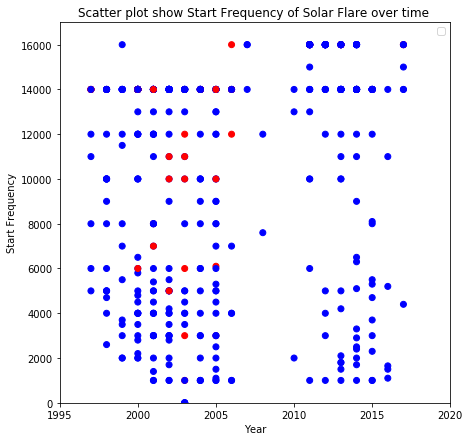

In [105]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot show Start Frequency of Solar Flare over time ')
plt.xlabel('Year')
plt.ylabel('Start Frequency')
plt.axis([1995,2020,0,17000])
groups = ("Top 50 Flare", "Normal Flare")
plt.scatter(years,plot_data['Start_Frequency'],c=colors)
plt.legend(groups[0],groups[1])
plt.show()

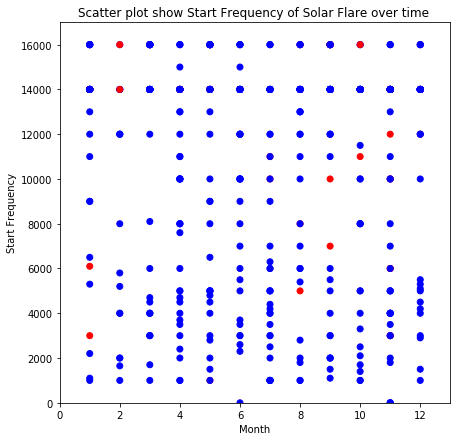

In [115]:
months = [] 
for item in plot_data['Start_Date']:
    months.append(int(item.split('/')[1]))
plt.figure(figsize=(7,7))
plt.title('Scatter plot show Start Frequency of Solar Flare over time ')
plt.xlabel('Month')
plt.ylabel('Start Frequency')
plt.axis([0,13,0,17000])
groups = ("Top 50 Flare", "Normal Flare")
plt.scatter(months,plot_data['Start_Frequency'],c=colors)
plt.show()

In [112]:
ctr = np.zeros((13,1))
for i in range(np.shape(months)[0]):
    if colors[i]=='red':
        ctr[months[i]]+=1
print(ctr)

[[ 0.]
 [ 4.]
 [ 2.]
 [ 1.]
 [ 5.]
 [ 5.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 6.]
 [ 3.]
 [13.]
 [ 4.]]


In [120]:
ctr = np.zeros((2020,1))
for i in range(np.shape(years)[0]):
    if colors[i]=='red':
        ctr[years[i]]+=1
for i in range(np.shape(ctr)[0]) : 
    if ctr[i] > 0 : 
        print(i)
        print(ctr[i])

1997
[3.]
1998
[1.]
2000
[6.]
2001
[8.]
2002
[3.]
2003
[7.]
2004
[2.]
2005
[6.]
2006
[3.]
2011
[3.]
2012
[1.]
2013
[3.]
2014
[1.]
2015
[1.]
2017
[2.]
